### Generate Volume Features from Paper

Potential Avenues for Exploration
- Empirical Distribution (Done)
- Serial Correlation

In [1]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

path='/home/jbohn/jupyter/personal/Kernel_Learning'

sys.path.append(path)

In [2]:
quotes=pd.read_csv(f"{path}/Data/cleaned_AAPL_quotes_2020-01-02.csv",index_col=0).sort_index()

quotes

,Participant_Timestamp,SIP_Timestamp,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,...,Best_Bid_Exchange,Best_Bid_Price,Best_Bid_Size,Best_Offer_Exchange,Best_Offer_Price,Best_Offer_Size,LULD_NBBO_Indicator,Security_Status_Indicator,National_BBO_Ind,date
2020-01-02 09:30:03.296828,140,2020-01-02 09:30:03.297207,N,AAPL,295.70,1.0,296.75,6.0,R,288805,...,Q,296.19,2.0,Z,296.26,2.0,A,,2,2020-01-02
2020-01-02 09:30:05.489204,141,2020-01-02 09:30:05.489581,N,AAPL,296.14,4.0,296.75,5.0,R,296557,...,N,296.14,4.0,Z,296.19,4.0,A,,2,2020-01-02
2020-01-02 09:30:05.663684,142,2020-01-02 09:30:05.664062,N,AAPL,295.70,1.0,296.75,5.0,R,297100,...,Q,296.13,1.0,Z,296.16,2.0,A,,2,2020-01-02
2020-01-02 09:30:06.278858,143,2020-01-02 09:30:06.279237,N,AAPL,294.05,1.0,296.12,2.0,R,299138,...,Q,296.03,1.0,Z,296.07,4.0,A,,2,2020-01-02
2020-01-02 09:30:14.710996,144,2020-01-02 09:30:14.711372,N,AAPL,295.12,1.0,295.74,1.0,R,318631,...,Z,295.65,6.0,N,295.74,1.0,A,,2,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 15:59:41.175398,87570,2020-01-02 15:59:41.175774,N,AAPL,300.41,2.0,300.66,1.0,R,30603857,...,Z,300.41,3.0,Q,300.44,4.0,A,,2,2020-01-02
2020-01-02 15:59:46.113982,87571,2020-01-02 15:59:46.114358,N,AAPL,300.29,3.0,300.46,1.0,R,30643992,...,Z,300.44,2.0,P,300.46,2.0,A,,2,2020-01-02
2020-01-02 15:59:50.118942,87572,2020-01-02 15:59:50.119320,N,AAPL,300.29,3.0,300.66,1.0,R,30672299,...,Q,300.37,3.0,Q,300.40,4.0,A,,2,2020-01-02
2020-01-02 15:59:52.913707,87573,2020-01-02 15:59:52.914082,N,AAPL,300.29,3.0,300.66,1.0,R,30696052,...,Q,300.36,1.0,Q,300.39,2.0,A,,2,2020-01-02


### Paper Features

In the paper the following features were utilized 
$$F=\{V_t,\frac{V_t}{||{V_t}||_1},V_t-V_{t-1},\frac{V_t-V_{t-1}}{||V_t-V_{t-1}||}\}$$

Where $V_t$ is size of best bid and ask level at time $t$

In [3]:
simple_quotes=quotes[['Exchange','Symbol','Best_Bid_Price','Best_Bid_Size','Best_Offer_Price', 'Best_Offer_Size']]

simple_quotes=simple_quotes
simple_quotes.index=pd.to_datetime(simple_quotes.index)
simple_quotes=simple_quotes.rename(columns={'Best_Bid_Size':'FB0','Best_Offer_Size':'FA0'})
simple_quotes['FB2']=simple_quotes['FB0'].diff(periods=1)
simple_quotes['FA2']=simple_quotes['FA0'].diff(periods=1)
simple_quotes=simple_quotes.dropna()


Note that since we are only looking at the top of the message book, features 1 and 3 trivially are equivalent to features 0 and 2

# Exploratory Data Analysis on distribution of our features 

### Stationary Volume

Text(0.5, 1.0, 'Histogram of Offer Volume')

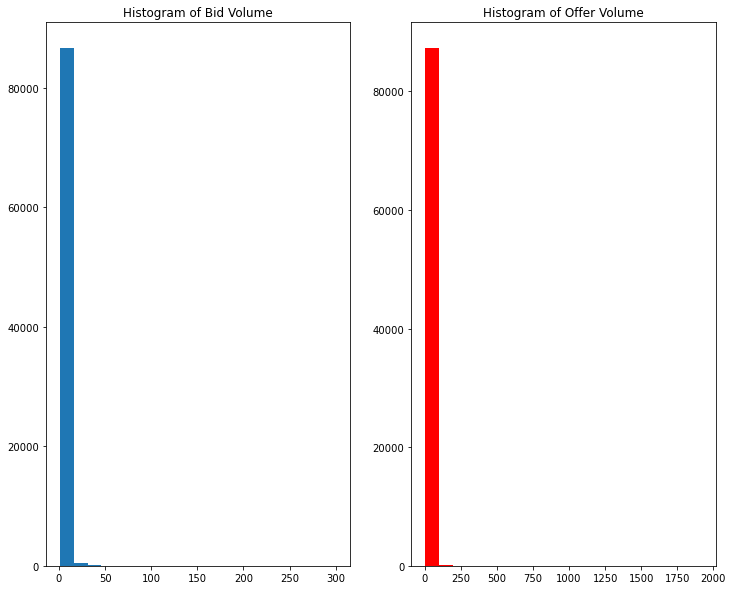

In [4]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB0'].values,bins=20)
ax[0].set_title("Histogram of Bid Volume")
ax[1].hist(simple_quotes['FA0'].values,bins=20, color='red')
ax[1].set_title("Histogram of Offer Volume")

### Time Dependent Volume

Text(0.5, 1.0, 'Histogram of Change in Offer Volume')

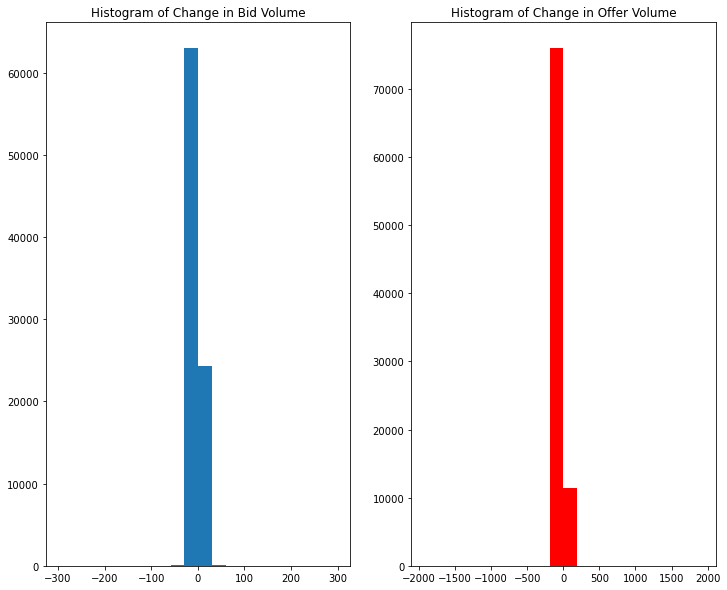

In [5]:
fig,ax=plt.subplots(1,2,figsize=(12,10))

ax[0].hist(simple_quotes['FB2'].values,bins=20)
ax[0].set_title("Histogram of Change in Bid Volume")
ax[1].hist(simple_quotes['FA2'].values,bins=20, color='red')
ax[1].set_title("Histogram of Change in Offer Volume")

### Generate Labels of outcomes 

In paper they used $\triangle =$ 5 , 10, 20, 50 ,100

In [6]:
def gen_interval(quotes,freq):
    start=datetime.strptime( str(str(quotes.index[0].date()) +" 09:30:00") ,"%Y-%m-%d %H:%M:%S")
    end=datetime.strptime( str(str(quotes.index[-1].date()) +" 16:00:00") ,"%Y-%m-%d %H:%M:%S")

    intervals=np.arange(start, end, np.timedelta64(freq ,'s'), dtype='datetime64[s]')
    return intervals

In [7]:
intervals=gen_interval(simple_quotes,60)


Aggregate data by timestamp 

In [8]:
simple_quotes['last_interval']=pd.Series(pd.to_datetime(simple_quotes.index)).apply(lambda x: intervals[intervals<x][-1]).values
simple_quotes['p_time']=simple_quotes.index

agg_fun={'Exchange':'first','Symbol':'first','Best_Bid_Price':'first','FB0':'first','Best_Offer_Price':'first','FA0':'first','FB2':'first' , 'FA2':'first', 'p_time':'first'}

grouped_quotes=simple_quotes.groupby('last_interval').agg(agg_fun)
grouped_quotes
                                                                               

,Exchange,Symbol,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,p_time
last_interval,,,,,,,,,
2020-01-02 09:30:00,N,AAPL,296.14,4.0,296.19,4.0,2.0,2.0,2020-01-02 09:30:05.489204
2020-01-02 09:31:00,N,AAPL,295.70,1.0,295.75,2.0,0.0,0.0,2020-01-02 09:31:00.012426
2020-01-02 09:32:00,N,AAPL,295.49,3.0,295.52,4.0,0.0,3.0,2020-01-02 09:32:00.020308
2020-01-02 09:33:00,N,AAPL,295.67,1.0,295.72,4.0,-3.0,3.0,2020-01-02 09:33:00.000573
2020-01-02 09:34:00,N,AAPL,296.51,2.0,296.55,2.0,1.0,1.0,2020-01-02 09:34:02.534603
...,...,...,...,...,...,...,...,...,...
2020-01-02 15:55:00,N,AAPL,300.23,5.0,300.25,1.0,0.0,0.0,2020-01-02 15:55:00.006852
2020-01-02 15:56:00,N,AAPL,300.11,8.0,300.12,1.0,4.0,-4.0,2020-01-02 15:56:00.061435
2020-01-02 15:57:00,N,AAPL,300.24,4.0,300.25,2.0,3.0,-1.0,2020-01-02 15:57:00.227387


### Label outcome and view distribution

In [9]:
def classify_mid(x):
    
    if x['Next_Best_Bid']>x['Best_Offer_Price']:
        return 1
    elif x['Next_Best_Offer']<x['Best_Bid_Price']:
        return -1
    else:
        return 0

grouped_quotes['Next_Best_Bid']=grouped_quotes['Best_Bid_Price'].shift(-1)
grouped_quotes['Next_Best_Offer']=grouped_quotes['Best_Offer_Price'].shift(-1)
grouped_quotes['outcome']=grouped_quotes.apply(lambda x: classify_mid(x),axis=1)
grouped_quotes['outcome'].value_counts()/len(grouped_quotes['outcome'].values)
grouped_quotes

,Exchange,Symbol,Best_Bid_Price,FB0,Best_Offer_Price,FA0,FB2,FA2,p_time,Next_Best_Bid,Next_Best_Offer,outcome
last_interval,,,,,,,,,,,,
2020-01-02 09:30:00,N,AAPL,296.14,4.0,296.19,4.0,2.0,2.0,2020-01-02 09:30:05.489204,295.70,295.75,-1
2020-01-02 09:31:00,N,AAPL,295.70,1.0,295.75,2.0,0.0,0.0,2020-01-02 09:31:00.012426,295.49,295.52,-1
2020-01-02 09:32:00,N,AAPL,295.49,3.0,295.52,4.0,0.0,3.0,2020-01-02 09:32:00.020308,295.67,295.72,1
2020-01-02 09:33:00,N,AAPL,295.67,1.0,295.72,4.0,-3.0,3.0,2020-01-02 09:33:00.000573,296.51,296.55,1
2020-01-02 09:34:00,N,AAPL,296.51,2.0,296.55,2.0,1.0,1.0,2020-01-02 09:34:02.534603,297.00,297.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 15:55:00,N,AAPL,300.23,5.0,300.25,1.0,0.0,0.0,2020-01-02 15:55:00.006852,300.11,300.12,-1
2020-01-02 15:56:00,N,AAPL,300.11,8.0,300.12,1.0,4.0,-4.0,2020-01-02 15:56:00.061435,300.24,300.25,1
2020-01-02 15:57:00,N,AAPL,300.24,4.0,300.25,2.0,3.0,-1.0,2020-01-02 15:57:00.227387,300.29,300.30,1


In [10]:
grouped_quotes['outcome'].value_counts()

 1    167
-1    141
 0     82
Name: outcome, dtype: int64

### Bulk Feature Generation

- Includes both simple features within paper and additional features generated within generator

In [2]:
from Features.feature_preprocessing import generate_features_from_quotes

In [3]:
start='2020-01-02'
end='2020-01-30'
dt_range=pd.date_range(start=start,end=end,freq='D')

for dt in dt_range:
    try:
        cleaned_quotes=pd.read_csv(f"/home/jbohn/jupyter/personal/Kernel_Learning/Data/cleaned_AAPL_quotes_{dt.date()}.csv",index_col=0)
    except:
        print(f"Could not find quotes for {dt.date()}")
        continue
    generate_features_from_quotes(cleaned_quotes,time_agg=5,single_dt=str(dt.date()),save=True)
    print(f"Finished Feature Generation for {dt.date()}")

Finished Feature Generation for 2020-01-02
Finished Feature Generation for 2020-01-03
Could not find quotes for 2020-01-04
Could not find quotes for 2020-01-05
Finished Feature Generation for 2020-01-06
Finished Feature Generation for 2020-01-07
Finished Feature Generation for 2020-01-08
Finished Feature Generation for 2020-01-09
Finished Feature Generation for 2020-01-10
Could not find quotes for 2020-01-11
Could not find quotes for 2020-01-12
Finished Feature Generation for 2020-01-13
Finished Feature Generation for 2020-01-14
Finished Feature Generation for 2020-01-15
Finished Feature Generation for 2020-01-16
Finished Feature Generation for 2020-01-17
Could not find quotes for 2020-01-18
Could not find quotes for 2020-01-19
Could not find quotes for 2020-01-20
Finished Feature Generation for 2020-01-21
Finished Feature Generation for 2020-01-22
Finished Feature Generation for 2020-01-23
Finished Feature Generation for 2020-01-24
Could not find quotes for 2020-01-25
Could not find q